In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('features_3_sec.csv')

In [3]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
data.head()


First few rows of the dataset:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
# Display last few rows of the dataset
print("\nLast few rows of the dataset:")
data.tail()


Last few rows of the dataset:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,rock.00099.9.wav,66149,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,...,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


In [5]:
# Display the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(data.shape)



Shape of the dataset:
(9990, 60)


In [6]:
# Display the column names of the dataset
data.columns.values# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isna().sum())


Missing values in each column:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean 

In [7]:
# Display the column names of the dataset
print("\nColumn names of the dataset:")
print(data.columns.values)


Column names of the dataset:
['filename' 'length' 'chroma_stft_mean' 'chroma_stft_var' 'rms_mean'
 'rms_var' 'spectral_centroid_mean' 'spectral_centroid_var'
 'spectral_bandwidth_mean' 'spectral_bandwidth_var' 'rolloff_mean'
 'rolloff_var' 'zero_crossing_rate_mean' 'zero_crossing_rate_var'
 'harmony_mean' 'harmony_var' 'perceptr_mean' 'perceptr_var' 'tempo'
 'mfcc1_mean' 'mfcc1_var' 'mfcc2_mean' 'mfcc2_var' 'mfcc3_mean'
 'mfcc3_var' 'mfcc4_mean' 'mfcc4_var' 'mfcc5_mean' 'mfcc5_var'
 'mfcc6_mean' 'mfcc6_var' 'mfcc7_mean' 'mfcc7_var' 'mfcc8_mean'
 'mfcc8_var' 'mfcc9_mean' 'mfcc9_var' 'mfcc10_mean' 'mfcc10_var'
 'mfcc11_mean' 'mfcc11_var' 'mfcc12_mean' 'mfcc12_var' 'mfcc13_mean'
 'mfcc13_var' 'mfcc14_mean' 'mfcc14_var' 'mfcc15_mean' 'mfcc15_var'
 'mfcc16_mean' 'mfcc16_var' 'mfcc17_mean' 'mfcc17_var' 'mfcc18_mean'
 'mfcc18_var' 'mfcc19_mean' 'mfcc19_var' 'mfcc20_mean' 'mfcc20_var'
 'label']


In [8]:
# Display information about the dataset (columns, non-null counts, data types)
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float

In [9]:
# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)


In [10]:
# Drop non-feature columns
non_feature_columns = ['filename', 'length', 'label']
X = data.drop(columns=non_feature_columns)
y = data['label']

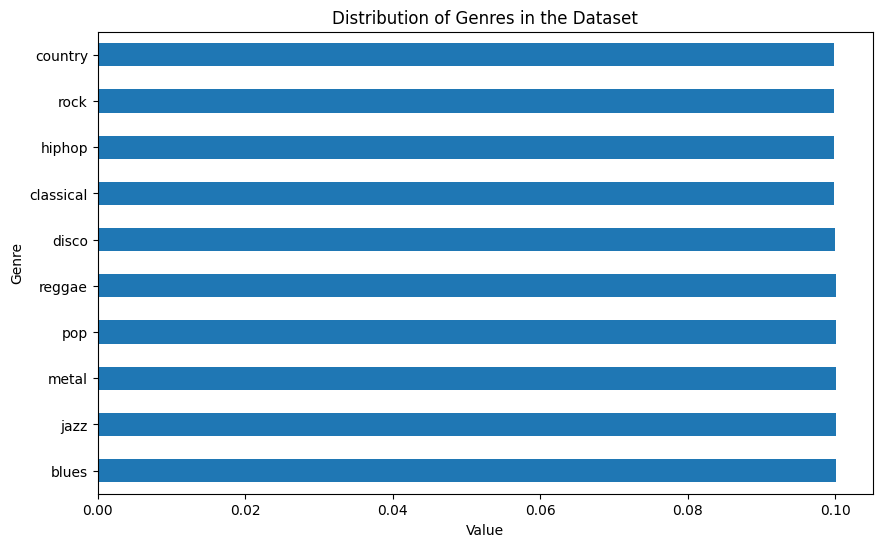

In [11]:
# Visualize the Distribution of Genres
plt.figure(figsize=(10, 6))
data['label'].value_counts(normalize=True).plot.barh()
ax = plt.gca()
ax.set(xlabel='Value', ylabel='Genre', title='Distribution of Genres in the Dataset')
plt.show()

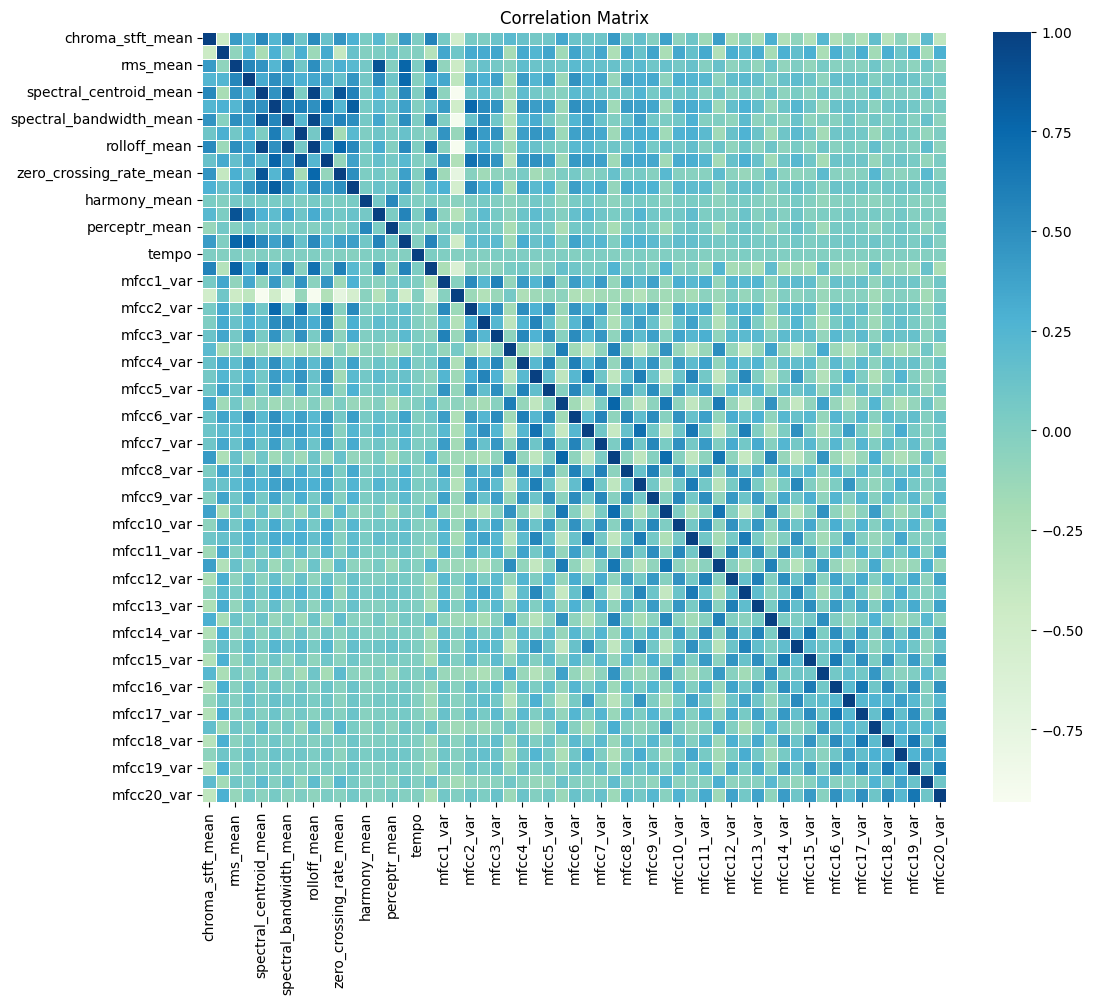

In [12]:
# Compute and Visualize Correlations
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='GnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

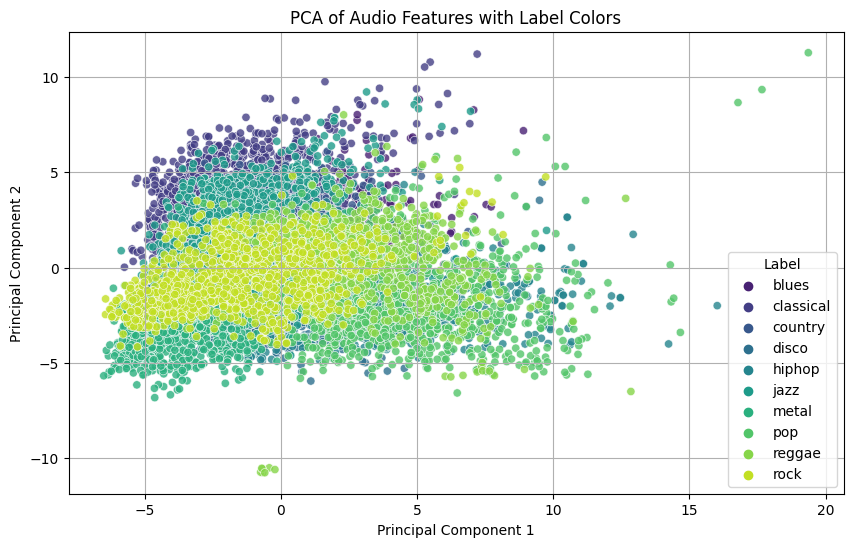

In [13]:
# Perform Standard Scaling on features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA with colors based on labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.8)
plt.title('PCA of Audio Features with Label Colors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [14]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8729
Precision: 0.8741
Recall: 0.8729
F1 Score: 0.8725



Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.85      0.86       208
   classical       0.92      0.98      0.95       203
     country       0.74      0.82      0.78       186
       disco       0.88      0.84      0.86       199
      hiphop       0.91      0.87      0.89       218
        jazz       0.84      0.90      0.87       192
       metal       0.90      0.95      0.92       204
         pop       0.93      0.94      0.93       180
      reggae       0.90      0.85      0.87       211
        rock       0.85      0.74      0.79       197

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



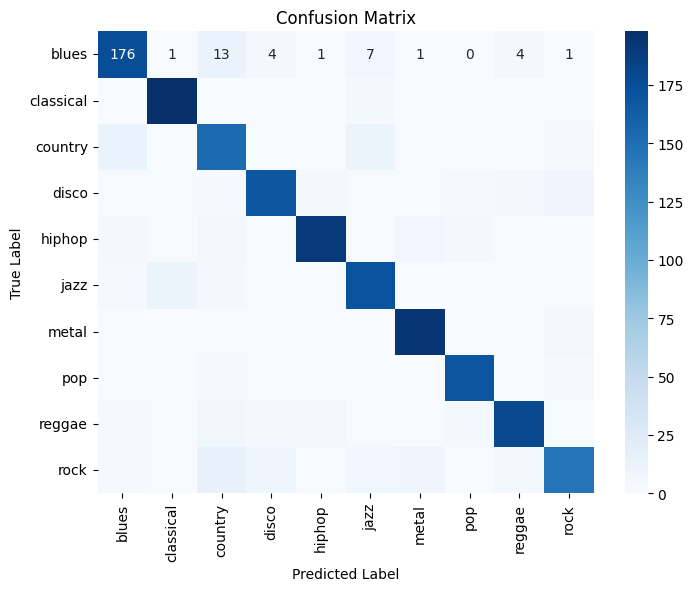

In [16]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Perform Grid Search to find the best parameters for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],   # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]    # Whether bootstrap samples are used when building trees
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)  # Use all available CPU cores


In [18]:
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("\nBest Parameters:")
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# Calculate accuracy, precision, recall, and F1-score for the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nBest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Best Model Evaluation:
Accuracy: 0.9089
Precision: 0.9100
Recall: 0.9089
F1 Score: 0.9089



Classification Report for the Best Model:
              precision    recall  f1-score   support

       blues       0.91      0.88      0.89       208
   classical       0.93      0.98      0.95       203
     country       0.79      0.87      0.83       186
       disco       0.91      0.89      0.90       199
      hiphop       0.96      0.92      0.94       218
        jazz       0.91      0.93      0.92       192
       metal       0.93      0.95      0.94       204
         pop       0.94      0.96      0.95       180
      reggae       0.93      0.90      0.91       211
        rock       0.89      0.81      0.85       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



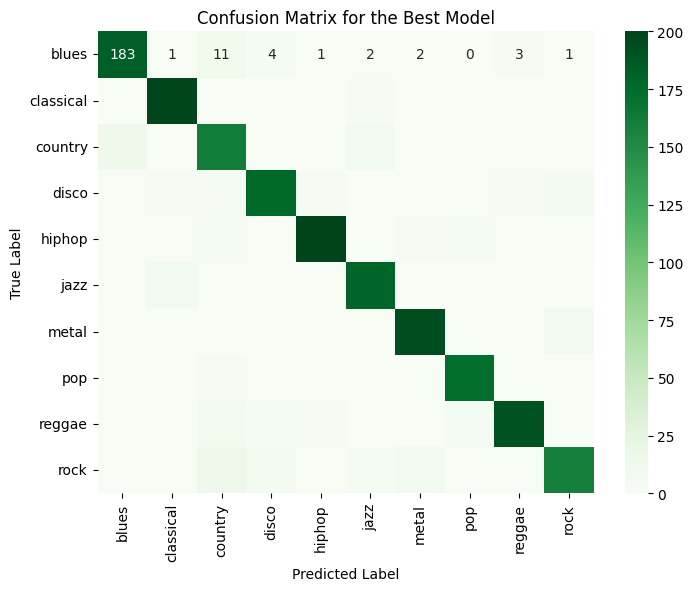

In [20]:
# Classification report for the best model
print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred))

# Confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the Best Model')
plt.show()